# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

##Learning Objectives


At the end of the experiment, you will be able to:

* extract meaningful features from the images using PCA

* apply SVM on the extracted data and recognize the face

**NOTE:**  The intent of this experiment is to understand the SVM parameters and tune your classifier

In [ ]:
#@title Experiment Walkthrough Video
from IPython.display import HTML

HTML("""<video width="720" height="540" controls>
  <source src="https://cdn.talentsprint.com/talentsprint1/archives/sc/misc/svm_facerecognition.mp4" type="video/mp4">
</video>
""")

##Dataset 

## Description

The dataset chosen for this experiment is Labeled Faces in the Wild dataset. The dataset is a collection of JPEG images of famous people collected over the internet. Each picture is centered on a single face. Each pixel of each channel in RGB is encoded by a float value ranging between
0.0 to 1.0.

To know more about the dataset you can refer below link :


http://vis-www.cs.umass.edu/lfw/

##Domain Information


As it is known by you that every face is different and a face has various features. Some of us have a broad forehead, some have narrow, some have fuller lips whereas some have thinner lips, etc. Additionally, every feature of the face has different variations. An ideal face recognition system should be able to consider all the variations and the challenges faced to recognize a face accurately.


###Below we have listed a few challenges


**Illumination:** Lighting aspect

**Background:** The placement of the subject also serves as a significant contributor to the limitations.

**Pose:** The movements of the head 

**Occlusion:**  beard, mustache, accessories (goggles, caps, mask, etc.) also meddle with the evaluation of a face recognition system. The Presence of such components makes the subject diverse and hence it becomes difficult for the system to operate in a non-simulated environment. 

**Expressions:** A change is an expression brings a change into all the aspects of the face.

All these make the problem very complex.

##AI/ML Technique



### SVM

SVM stands for Support vector machines. It used for both classification and regression tasks. SVM works by searching the linear optimal separating hyperplane (decision boundary). The logic is that decision boundary with large margin is better when handling unseen data compared to decision boundary with a small margin. When the data is not
linearly separable, SVM transforms original data into a higher dimension using a nonlinear mapping to obtain the separating hyperplane.


To know more about SVM you can refer the below link :

https://www.quantstart.com/articles/Support-Vector-Machines-A-Guide-for-Beginners



### Setup Steps

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2100121" #@param {type:"string"}


In [9]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "5142192291" #@param {type:"string"}


In [8]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "U2W9_13_SVM_Facerecognition_B" #name of the notebook

def setup(): 
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


As an example of support vector machines in action, let's take a look at the facial recognition problem

### Importing the required packages

In [10]:
from sklearn.datasets import fetch_lfw_people
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import seaborn as sns; sns.set()


import warnings
warnings.simplefilter("ignore")

### Loading the dataset from sklearn datasets

In [11]:
faces = fetch_lfw_people(min_faces_per_person = 60)

In [12]:
# Checking for the target names (Label names)
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [13]:
# Checking for the shape of images
print(faces.images.shape)

(1348, 62, 47)


To get a sense of the data, let us visualize the faces

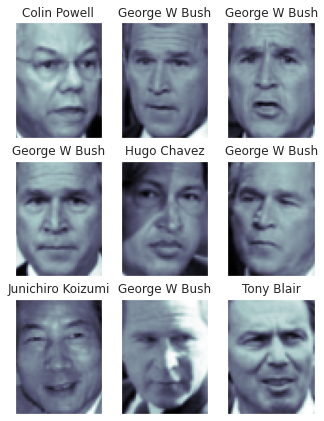

In [19]:
# YOUR CODE HERE : Visualize first few faces from the dataset
import matplotlib.pyplot as plt

n_row, n_col = 3, 3
plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))

for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(faces.images[i], cmap='bone')
    plt.title(faces.target_names[faces.target[i]], size=12)
    plt.xticks(())
    plt.yticks(())

Each image contains [62×47] or nearly 3,000 pixels. We could proceed by simply using each pixel value as a feature, but often it is more effective to use some sort of preprocessor to extract more meaningful features; here we will use a principal component analysis to extract 150 fundamental components to feed into our support vector machine classifier. We can do this most straightforwardly by packaging the preprocessor and the classifier into a single pipeline:

In PCA, the parameter Whiten = True, will remove some information from the transformed signal (the relative variance scales of the components) but can sometime improve the predictive accuracy of the downstream estimators by making their data respect some hard-wired assumptions.

In support vector machines, 'C' is a hyperparameter determining the penalty for misclassifying an sample. One method for handling imbalanced classes in support vector machines is to weight 'C' by classes, so that

$C_k = C∗w_j$

where $C$ is the penalty for misclassification, $w_j$ is a weight inversely proportional to class $j$’s frequency and 
$C_j$ is the $C$ value for class $j$. The general idea is to increase the penalty for misclassifying minority classes to prevent them from being “overwhelmed” by the majority class.

In scikit-learn, for SVC we can set the values for $C_j$
 automatically by setting **class_weight='balanced'**.  The balanced argument automatically weighs classes such that:

  $w_j = \frac{n}{kn_j}$

where $w_j$ is the weight to class $j$,  n is the number of samples, $n_j$ is the number of samples in class $j$
, and k is the total number of classes.


Note: Refer [make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) from sklearn

In [20]:
pca = PCA(n_components=150, whiten=True, random_state=42) # YOUR CODE HERE :  Explore and create a 'PCA' object from SkLearn (for easy start refer to the examples in sklearn documentation)
svc = SVC(kernel='rbf', class_weight='balanced' ) # YOUR CODE HERE :  Explore and create a 'SVMClassifier' object from SkLearn (for easy start refer to the examples in sklearn documentation)
model = make_pipeline(pca, svc)

For testing our classifier output, we will split the data into a training and testing set:

In [21]:
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [22]:
# Checking for the shape of Xtest
Xtest.shape

(337, 2914)

In [23]:
# Checking for the shape of Xtrain
Xtrain.shape

(1011, 2914)

Finally, we can use a grid search cross-validation to explore combinations of parameters. Here we will adjust C (which controls the margin hardness) and gamma (which controls the size of the radial basis function kernel), and determine the best model:

In [24]:
param_grid = {'svc__C': [1, 5, 10, 50],      # It takes some time to run this cell
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
              
grid = GridSearchCV(model, param_grid) # YOUR CODE HERE : Explore and Perform Grid search.
        # HINT : You can use 'GridSearchCV' function from SkLearn (for easy start refer to the examples in the documentation)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 1min 10s, sys: 17.3 s, total: 1min 27s
Wall time: 53.5 s
{'svc__C': 10, 'svc__gamma': 0.001}


The optimal values fall toward the middle of our grid; if they fell at the edges, we would want to expand the grid to make sure we have found the true optimum. 

Now with this cross-validated model, we can predict the labels for the test data, which the model has not yet seen:

In [25]:
model = grid.best_estimator_
y_pred = model.predict(Xtest)

Let's take a look at a few of the test images along with their predicted values:

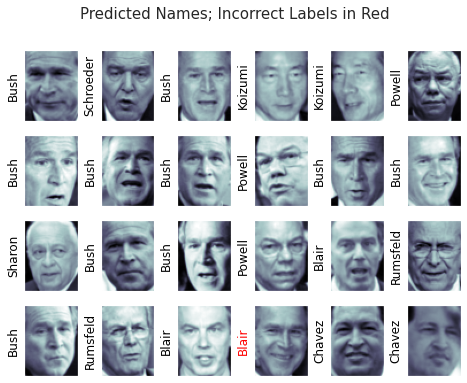

In [26]:
# Plotting the images in subplots
n_rows, n_cols = 4, 6
plt.figure(figsize=( 8, 6))

for i in range(n_rows * n_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    plt.xticks(())
    plt.yticks(())
    plt.ylabel(faces.target_names[y_pred[i]].split()[-1],
                   color='black' if y_pred[i] == ytest[i] else 'red')
plt.suptitle('Predicted Names; Incorrect Labels in Red', size = 15)
plt.show()

Out of this small sample, our optimal estimator mislabeled only a single face (Bush’s face in the bottom row was mislabeled as Blair). We can get a better sense of our estimator's performance using the classification report, which lists recovery statistics label by label:

In [27]:
# YOUR CODE HERE : Print the classification report
# HINT : You can use 'classification_report' function from SkLearn (for easy start refer to examples in the documentation )
print(classification_report(ytest, y_pred,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



Display the confusion matrix between these classes

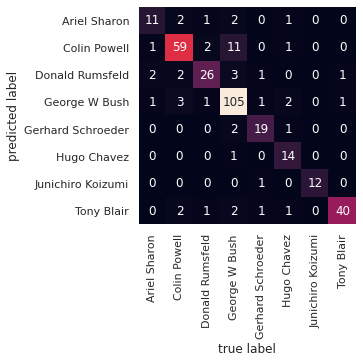

In [28]:
# YOUR CODE HERE : Calculate and plot the 'confusion_matrix'. 
# HINT : Refer to 'confusion_matix' function from SkLearn (for easy start refer to the examples in the documentation)
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

For a real-world facial recognition task, in which the photos do not come pre-cropped into nice grids, the only difference in the facial classification scheme is the feature selection: you would need to use a more sophisticated algorithm to find the faces, and extract features that are independent of the pixelation.

#### Acknowledgment:  Python Data Science Handbook by Jake VanderPlas

### Please answer the questions below to complete the experiment:

In [29]:
#@title State True or False: The 'C' parameter controls the size of the radial basis function kernel.{ run: "auto", form-width: "500px", display-mode: "form" }
Answer = "FALSE" #@param ["","TRUE","FALSE"]


In [30]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [31]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "non" #@param {type:"string"}


In [32]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [33]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [34]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [35]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [36]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 8911
Date of submission:  04 Nov 2020
Time of submission:  00:03:16
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
